In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.utils import shuffle

tff.backends.reference.set_reference_context()

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import activations

import math
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import seaborn as sns
sns.set_style("whitegrid")

In [4]:
origTra = open('./Datasets/pendigits/pendigits-orig.tra', 'r').read()

In [5]:
listOrigTra = []
for i in origTra.split('COMMENT ')[1:]:
    listOrigTra.append(i.split()[1])
    
len(listOrigTra)

7494

In [6]:
tra = open('./Datasets/pendigits/pendigits.tra', 'r').read()
listTra = []
for i in tra.split('\n'):
    listTra.append(i[-1])
    
len(listTra)

7494

In [7]:
set(listOrigTra)

{'1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [8]:
l=[int(i) for i in listOrigTra]
print(max(l))
print(min(l))

30
1


In [9]:
origTes = open('./Datasets/pendigits/pendigits-orig.tes', 'r').read()

In [10]:
listOrigTes = []
for i in origTes.split('COMMENT ')[1:]:
    listOrigTes.append(i.split()[1])
    
len(listOrigTes)

3498

In [11]:
set(listOrigTes)

{'1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9'}

In [12]:
listOrigTes = [str(int(i)+30) for i in listOrigTes]

In [13]:
set(listOrigTes)

{'31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44'}

In [14]:
l=[int(i) for i in listOrigTes]
print(max(l))
print(min(l))

44
31


In [15]:
tes = open('./Datasets/pendigits/pendigits.tes', 'r').read()
listTes = []
for i in tes.split('\n'):
    listTes.append(i[-1])
    
len(listTes)

3498

In [16]:
columns = ['Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10', 'Input11', 'Input12', 'Input13', 'Input14', 'Input15', 'Input16', 'digit']

In [17]:
df_tra = pd.read_csv('./Datasets/pendigits/pendigits.tra', delimiter = ',', names=columns , header=None)
df_tra.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,digit
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [18]:
df_tra['writer'] = listOrigTra
df_tra.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,digit,writer
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8,12
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2,26
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1,11
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4,14
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1,10


In [19]:
df_tes = pd.read_csv('./Datasets/pendigits/pendigits.tes', delimiter = ',', names=columns , header=None)
df_tes.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,digit
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [20]:
df_tes['writer'] = listOrigTes
df_tes.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,digit,writer
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,36
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,42
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,35
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,37
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,35


In [21]:
df = pd.concat([df_tra,df_tes])
df.shape

(10992, 18)

array([[<AxesSubplot:title={'center':'digit'}>]], dtype=object)

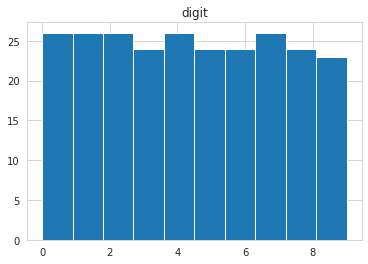

In [27]:
df[df['writer'] == '1'].hist('digit')

In [23]:
# df[df['writer'] == '2'].hist('digit')

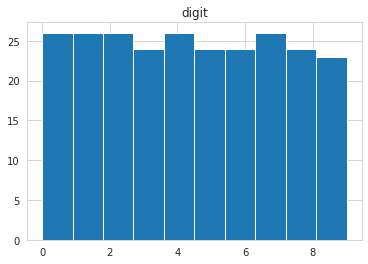

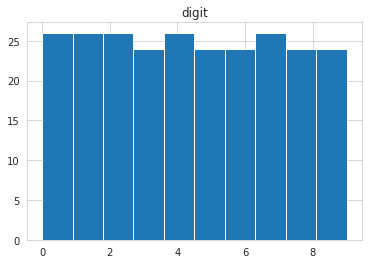

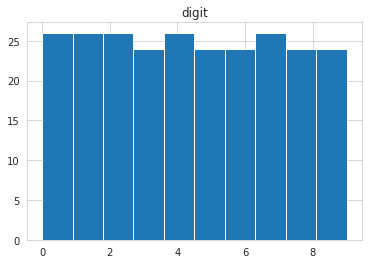

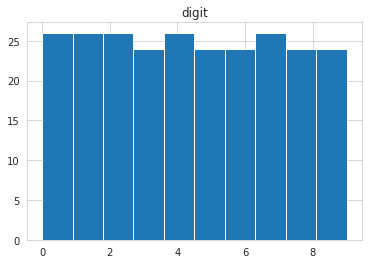

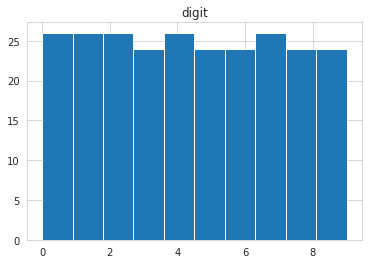

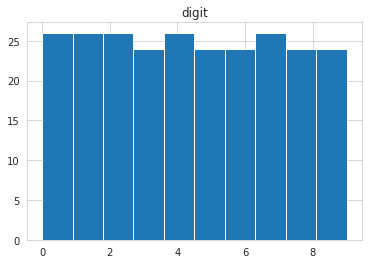

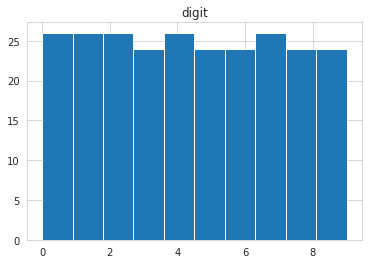

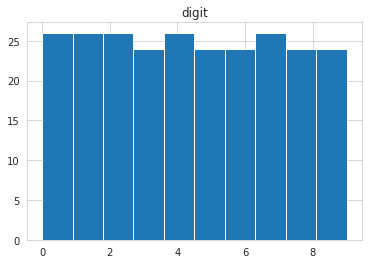

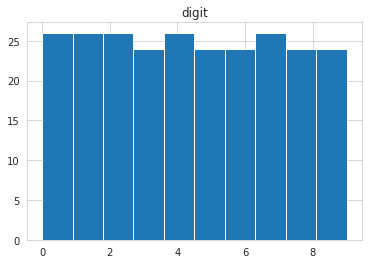

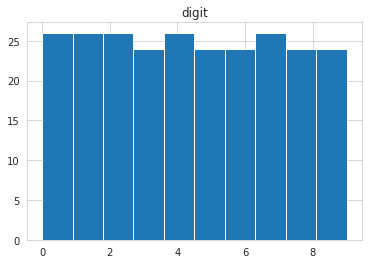

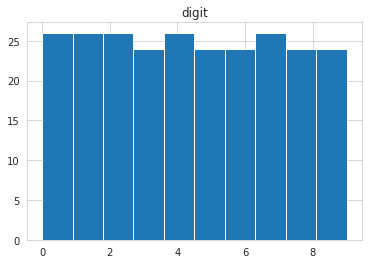

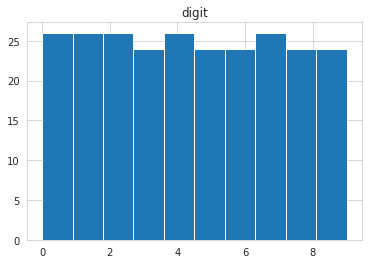

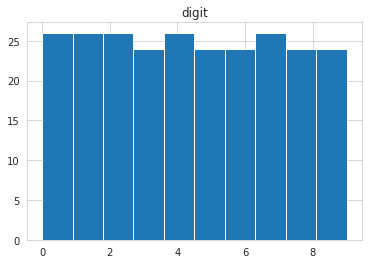

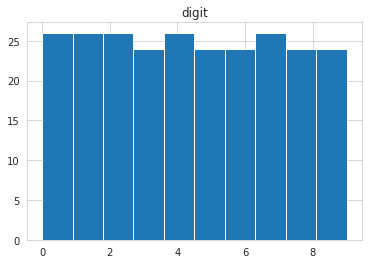

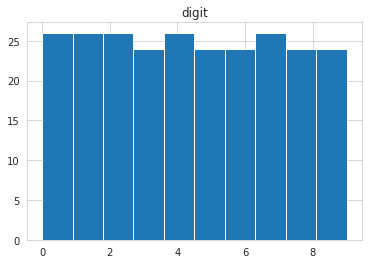

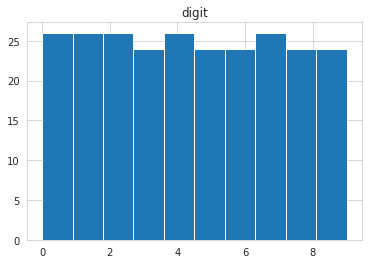

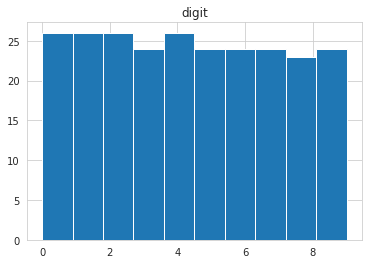

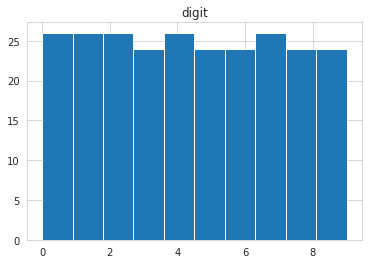

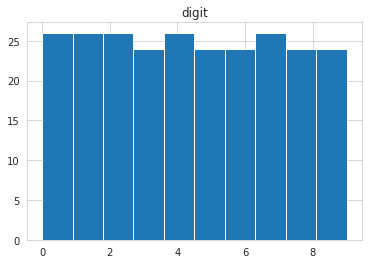

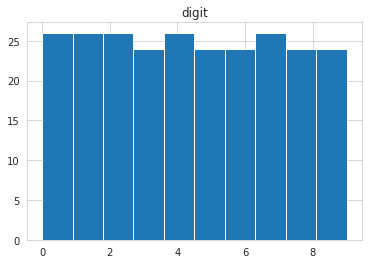

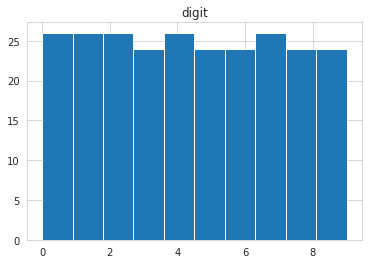

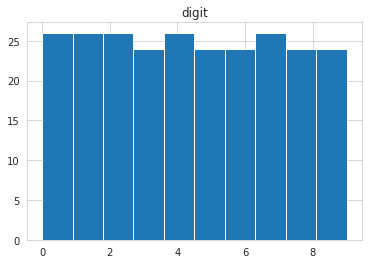

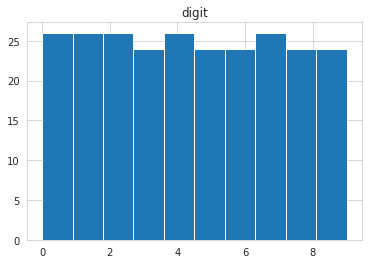

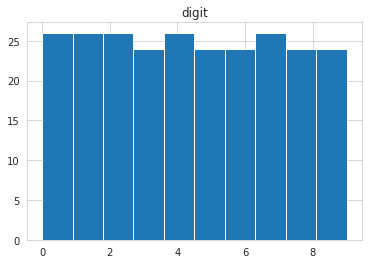

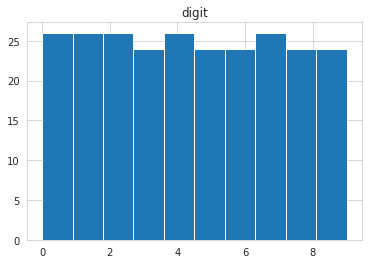

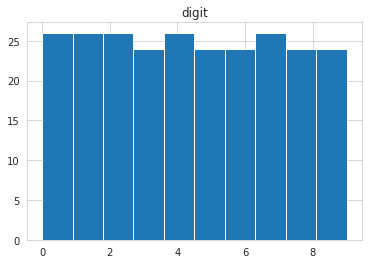

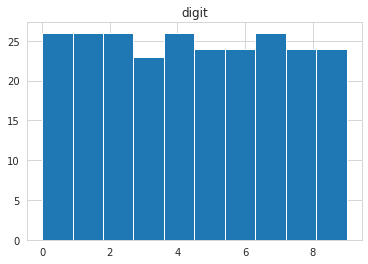

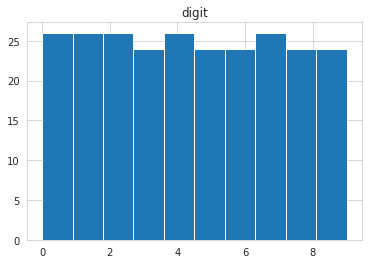

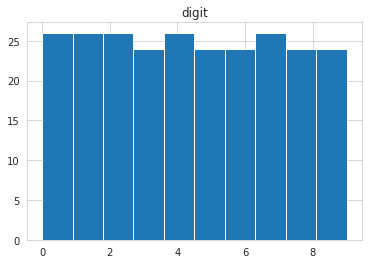

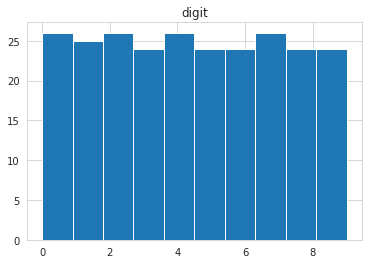

In [28]:
for i in range(1,31):
    df[df['writer'] == str(i)].hist('digit')